In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [ ]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=9f231d41efb5ebcdd27ba14d0bd62d73ca09f0664c2bf783b7ffad5f59c07b79
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4517    0  4517    0     0  15886      0 --:--:-- --:--:-- --:--:-- 15904
100  517k  100  517k    0     0   446k      0  0:00:01  0:00:01 --:--:-- 1042k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4493    0  4493    0     0  16062      0 --:--:-- --:--:-- --:--:-- 16046
100  392k  100  392k    0     0   348k      0  0:00:01  0:00:01 --:--:--  348k


In [ ]:
import talib as ta
import numpy as np
import pandas as pd
import yfinance as yf


# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from scipy.stats import uniform

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

#Stat
from scipy import stats


#1) Model : ERW price prediction

## Import Historical price data of ERW stock

In [ ]:
"""erw = yf.Ticker('erw.bk')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
erw_price_df = erw.history(interval=interval,start=start,end=end)
erw_price_df"""

"erw = yf.Ticker('erw.bk')\ninterval = '15m'\nstart = '2023-11-6'\nend = '2023-12-30'\nerw_price_df = erw.history(interval=interval,start=start,end=end)\nerw_price_df"

In [ ]:
#Import data
erw_price_df = pd.read_csv('/content/ERW_6-11 to 08-01.csv')
erw_price_df

,Datetime,Open,High,Low,Close,Volume
0,2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200
1,2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400
2,2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800
3,2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162
4,2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012
...,...,...,...,...,...,...
755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900
756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100
757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800
758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400


In [ ]:
erw_price_df.set_index('Datetime', inplace=True)
erw_price_df

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012
...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800


In [ ]:
erw_price_df= erw_price_df[["Open","High","Low","Close","Volume"]]
erw_price_df


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012
...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800


## Define features


In [ ]:
#Moving Average
erw_price_df['SME'] = erw_price_df['Close'].rolling(window=10).mean()
erw_price_df

,Open,High,Low,Close,Volume,SME
Datetime,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN
...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215


In [ ]:
#RSI
erw_price_df['RSI'] = ta.RSI(np.array(erw_price_df['Close']), timeperiod =14)
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430


In [ ]:
#Stochastic Oscillator
# Define periods
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
erw_price_df['n_high'] = erw_price_df['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
erw_price_df['n_low'] = erw_price_df['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
erw_price_df['%K'] = (erw_price_df['Close'] - erw_price_df['n_low']) * 100 / (erw_price_df['n_high'] - erw_price_df['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
erw_price_df['%D'] = erw_price_df['%K'].rolling(d_period).mean()
erw_price_df["Stochastic"] = erw_price_df['%K'] - erw_price_df['%D']

erw_price_df =erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI','%K', '%D', 'Stochastic']]

erw_price_df


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic
Datetime,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430,0.0,0.000000,0.000000
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430,0.0,0.000000,0.000000
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430,0.0,0.000000,0.000000


In [ ]:
#Stochastic Correlation
erw_price_df['Sto_Corr'] = erw_price_df['Close'].rolling(window=14).corr(erw_price_df['Stochastic'])





<ipython-input-14-0995d297f941>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erw_price_df['Sto_Corr'] = erw_price_df['Close'].rolling(window=14).corr(erw_price_df['Stochastic'])


In [ ]:
#Volatility
ret = 100 * (erw_price_df.pct_change()[1:]['Close'])
erw_price_df['Volatility'] = ret.rolling(5).std()
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility
Datetime,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000


In [ ]:
"""#Index Price
set100 = yf.Ticker('^SET100.BK')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
set100_df = set100.history(interval=interval,start=start,end=end)"""


"#Index Price\nset100 = yf.Ticker('^SET100.BK')\ninterval = '15m'\nstart = '2023-11-6'\nend = '2023-12-30'\nset100_df = set100.history(interval=interval,start=start,end=end)"

In [ ]:
#Index Price
set100 = pd.read_csv("/content/set100_06-11 to 08-01.csv")

In [ ]:
set100.set_index('Datetime', inplace=True)
set100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,1960.069946,1963.719971,1959.209961,1962.109985,0,0,0
2023-11-06 10:15:00+07:00,1962.060059,1962.060059,1956.250000,1956.780029,0,0,0
2023-11-06 10:30:00+07:00,1957.319946,1958.020020,1954.150024,1956.290039,0,0,0
2023-11-06 10:45:00+07:00,1955.829956,1956.229980,1950.579956,1952.219971,0,0,0
2023-11-06 11:00:00+07:00,1951.609985,1951.660034,1944.589966,1948.839966,0,0,0
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,1944.420044,1946.020020,1940.910034,1941.689941,0,0,0
2024-01-05 15:30:00+07:00,1942.890015,1944.479980,1940.300049,1942.380005,0,0,0
2024-01-05 15:45:00+07:00,1942.459961,1944.310059,1940.819946,1941.170044,0,0,0


In [ ]:
erw_price_df["Index_Price"] = set100['Close']
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price
Datetime,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044


In [ ]:
#MACD


# # Calculate MACD values using the pandas_ta library
# df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

# Get the 26-day EMA of the closing price
k = erw_price_df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

# Get the 12-day EMA of the closing price
d = erw_price_df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d

# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Add all of our new values for the MACD to the dataframe
erw_price_df['MACD_Con_Di'] = erw_price_df.index.map(macd_h)

erw_price_df



,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di
Datetime,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350


In [ ]:
# SAR
erw_price_df['SAR'] = ta.SAR(erw_price_df.High.values, erw_price_df.Low.values, acceleration = 0.02, maximum = 0.2)
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,5.250000
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,5.252000
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,5.350000
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,5.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614


## EDA and prepare data

Check data type

In [ ]:
erw_price_df = erw_price_df.astype('float64')
erw_price_df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
SME            float64
RSI            float64
%K             float64
%D             float64
Stochastic     float64
Sto_Corr       float64
Volatility     float64
Index_Price    float64
MACD_Con_Di    float64
SAR            float64
dtype: object

Check infinity data in stochastic correlation data

In [ ]:
# Check if there are any infinity values in each column
# Check for infinity values in the DataFrame
is_infinity = np.isinf(erw_price_df)
for column in erw_price_df.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' contains infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


Fill infinity value

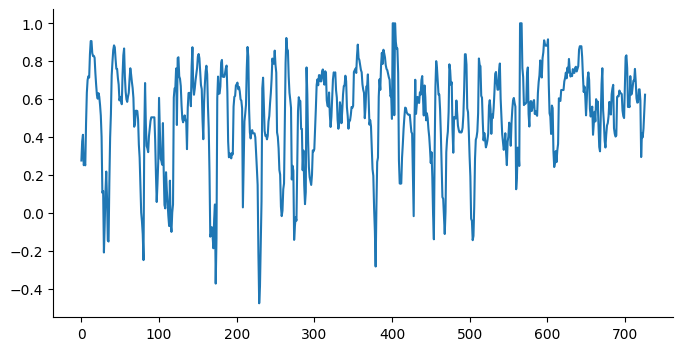

In [64]:
# Explore infinity data
from matplotlib import pyplot as plt
erw_price_df['Sto_Corr'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#fill infinity data
def replace_negative_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(-np.inf, replacement_value, inplace=True)
    return df

replacement_value = -1.0  # You can replace this with any value you want

result = replace_negative_infinity(erw_price_df, replacement_value)


def replace_positive_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(np.inf, replacement_value, inplace=True)
    return df

replacement_value = 1.0  # You can replace this with any value you want

result = replace_positive_infinity(erw_price_df, replacement_value)

# Check for infinity values in the DataFrame
is_infinity = np.isinf(result)
for column in result.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")

erw_price_df = result
erw_price_df

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' does not contain infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,5.250000
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,5.252000
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,5.350000
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,5.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614


Check Nan Value

In [ ]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(erw_price_df)

NaN values found in the following columns:
SME: 9 NaN values
RSI: 14 NaN values
%K: 13 NaN values
%D: 15 NaN values
Stochastic: 15 NaN values
Sto_Corr: 29 NaN values
Volatility: 5 NaN values
Index_Price: 2 NaN values
MACD_Con_Di: 33 NaN values
SAR: 1 NaN values


In [ ]:
# Check index of Nan Value
def get_nan_indices_for_column(dataframe, column_name):
    nan_indices = dataframe[dataframe[column_name].isna()].index

    if len(nan_indices) == 0:
        print(f"No NaN values found in the '{column_name}' column.")
    else:
        print(f"Indices of NaN values in the '{column_name}' column:")
        for index in nan_indices:
            print(index)

get_nan_indices_for_column(erw_price_df, "Index_Price")



Indices of NaN values in the 'Index_Price' column:
2023-11-20 14:15:00+07:00
2023-11-30 14:15:00+07:00


EDA data distribution for 'Index_Price' and check normality to select method to fill nan data

Shapiro-Wilk test statistic: nan, p-value: 1.0
The data follows a normal distribution (Do not reject H0)


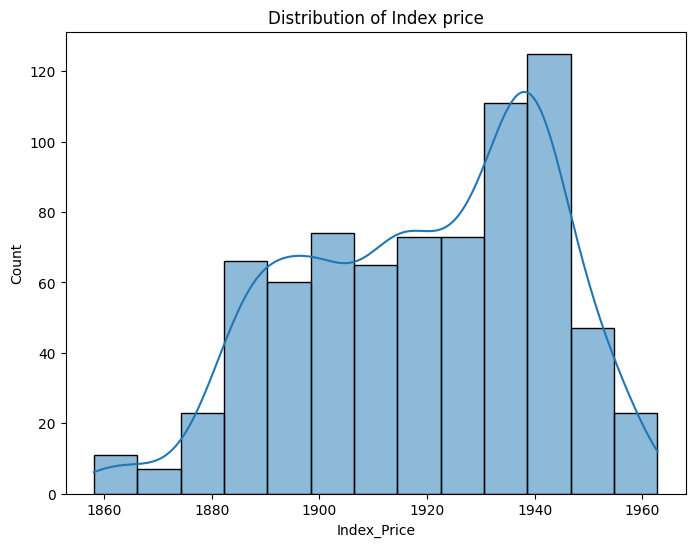

In [ ]:
#Data distribution for 'Index_Price'

# Check normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(erw_price_df['Index_Price'])
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Set significance level
alpha = 0.05

# Check normality based on p-value
if p_value > alpha:
    print("The data follows a normal distribution (Do not reject H0)")
else:
    print("The data does not follow a normal distribution (Do not reject H0)")

# Visualize distribution
plt.figure(figsize=(8, 6))
sns.histplot(erw_price_df['Index_Price'], kde=True)
plt.title("Distribution of Index price")
plt.show()

Plot graph to find relationship between Index price and ERW closing price

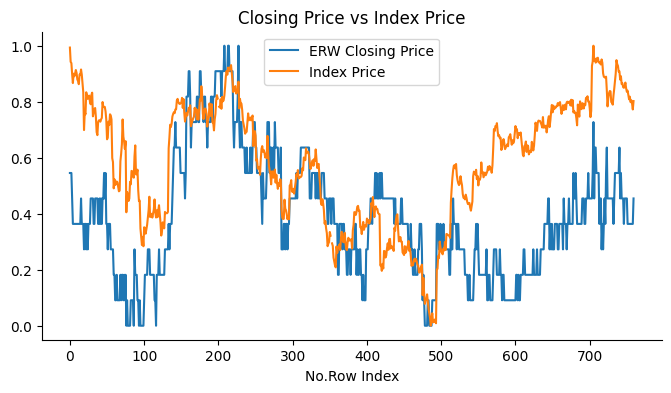

In [ ]:
# Function to normalize the DataFrame
def normalize_dataframe(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

# Normalize the DataFrame
normalized_df = normalize_dataframe(erw_price_df)


#Plot Closing price of ERW stock and Index price
# Assuming normalized_df is your DataFrame
ax = normalized_df[['Close', 'Index_Price']].plot(kind='line', figsize=(8, 4), title='Closing Price vs Index Price')
ax.spines[['top', 'right']].set_visible(False)

# Adding x-axis label
plt.xlabel('No.Row Index')

# Adding legends for each line
ax.legend(['ERW Closing Price', 'Index Price'])

plt.show()

Drop Nan data for SME,RSI,Stochastic,Volatility,and MACD





In [ ]:
#Check dataframe
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,5.250000
2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,5.252000
2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,5.350000
2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,5.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614


In [ ]:
erw_price_df.reset_index(drop=False, inplace=True)
erw_price_df

,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,2023-11-06 10:00:00+07:00,5.25,5.35,5.25,5.30,969200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.109985,NaN,NaN
1,2023-11-06 10:15:00+07:00,5.30,5.35,5.30,5.30,182400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.780029,NaN,5.250000
2,2023-11-06 10:30:00+07:00,5.30,5.30,5.30,5.30,233800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.290039,NaN,5.252000
3,2023-11-06 10:45:00+07:00,5.30,5.35,5.25,5.25,1600162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.219971,NaN,5.350000
4,2023-11-06 11:00:00+07:00,5.25,5.30,5.20,5.20,955012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.839966,NaN,5.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.0,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.0,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.0,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614
758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.0,0.000000,0.000000,0.532327,0.000000,1938.969971,-0.004334,5.325062


In [ ]:
erw_price_df = erw_price_df.drop(range(33))
erw_price_df.reset_index(drop=False, inplace=True)
erw_price_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.276815,0.425919,1939.199951,0.004774,5.172493
1,34,2023-11-07 15:30:00+07:00,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.377555,0.676680,1939.500000,0.006209,5.177593
2,35,2023-11-07 15:45:00+07:00,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.412295,0.676680,1936.099976,0.006834,5.182489
3,36,2023-11-07 16:00:00+07:00,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.251918,0.676680,1930.489990,0.006904,5.187190
4,37,2023-11-07 16:15:00+07:00,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.262363,0.430015,1929.369995,0.006605,5.191702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
723,756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
724,757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614
725,758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.532327,0.000000,1938.969971,-0.004334,5.325062


Imputation for Price Index

In [ ]:
from sklearn.impute import SimpleImputer
# Choose the column with missing data
column_with_missing_data = 'Index_Price'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
erw_price_df[column_with_missing_data] = imputer.fit_transform(erw_price_df[[column_with_missing_data]])

erw_price_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.276815,0.425919,1939.199951,0.004774,5.172493
1,34,2023-11-07 15:30:00+07:00,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.377555,0.676680,1939.500000,0.006209,5.177593
2,35,2023-11-07 15:45:00+07:00,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.412295,0.676680,1936.099976,0.006834,5.182489
3,36,2023-11-07 16:00:00+07:00,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.251918,0.676680,1930.489990,0.006904,5.187190
4,37,2023-11-07 16:15:00+07:00,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.262363,0.430015,1929.369995,0.006605,5.191702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
723,756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
724,757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614
725,758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.532327,0.000000,1938.969971,-0.004334,5.325062


Check NaN again

In [ ]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(erw_price_df)

NaN values found in the following columns:
Sto_Corr: 1 NaN values


Imputation for Sto_Corr

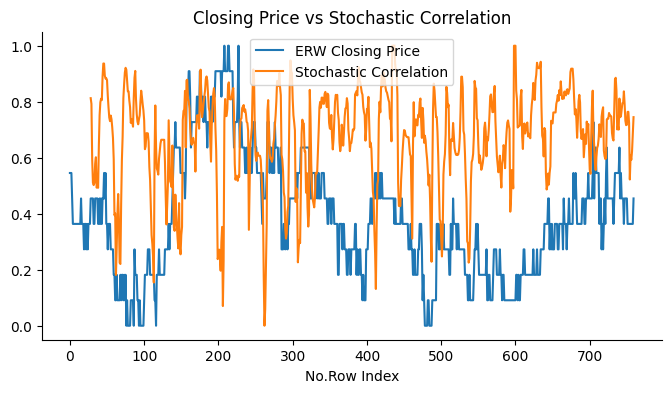

In [ ]:
#Plot Closing price of ERW stock and Stochastic correlation
# Assuming normalized_df is your DataFrame
ax = normalized_df[['Close', 'Sto_Corr']].plot(kind='line', figsize=(8, 4), title='Closing Price vs Stochastic Correlation')
ax.spines[['top', 'right']].set_visible(False)

# Adding x-axis label
plt.xlabel('No.Row Index')

# Adding legends for each line
ax.legend(['ERW Closing Price', 'Stochastic Correlation'])

plt.show()

In [ ]:
# Choose the column with missing data
column_with_missing_data = 'Sto_Corr'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
erw_price_df[column_with_missing_data] = imputer.fit_transform(erw_price_df[[column_with_missing_data]])

erw_price_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.276815,0.425919,1939.199951,0.004774,5.172493
1,34,2023-11-07 15:30:00+07:00,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.377555,0.676680,1939.500000,0.006209,5.177593
2,35,2023-11-07 15:45:00+07:00,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.412295,0.676680,1936.099976,0.006834,5.182489
3,36,2023-11-07 16:00:00+07:00,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.251918,0.676680,1930.489990,0.006904,5.187190
4,37,2023-11-07 16:15:00+07:00,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.262363,0.430015,1929.369995,0.006605,5.191702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876
723,756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219
724,757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614
725,758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.532327,0.000000,1938.969971,-0.004334,5.325062


In [ ]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(erw_price_df)

No NaN values found in any column.


## Define Target Variable
If closing price next 15 minute is higher than current closing price, then we will buy the stock (1), else we will sell it (-1).

In [ ]:
erw_price_df["y"] = np.where(erw_price_df['Close'].shift(-1) > erw_price_df['Close'],1,-1)
erw_price_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR,y
0,33,2023-11-07 15:15:00+07:00,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.276815,0.425919,1939.199951,0.004774,5.172493,1
1,34,2023-11-07 15:30:00+07:00,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.377555,0.676680,1939.500000,0.006209,5.177593,-1
2,35,2023-11-07 15:45:00+07:00,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.412295,0.676680,1936.099976,0.006834,5.182489,-1
3,36,2023-11-07 16:00:00+07:00,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.251918,0.676680,1930.489990,0.006904,5.187190,-1
4,37,2023-11-07 16:15:00+07:00,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.262363,0.430015,1929.369995,0.006605,5.191702,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.420342,0.425919,1941.689941,-0.007238,5.332876,-1
723,756,2024-01-05 15:30:00+07:00,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.399043,0.000000,1942.380005,-0.006344,5.330219,-1
724,757,2024-01-05 15:45:00+07:00,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.444878,0.000000,1941.170044,-0.005350,5.327614,-1
725,758,2024-01-05 16:00:00+07:00,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.532327,0.000000,1938.969971,-0.004334,5.325062,1


## Create Final Dataframe for Train Model

In [ ]:
erw_price_df = erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
       'Stochastic', 'Volatility', 'Sto_Corr', 'Index_Price', 'MACD_Con_Di','SAR','y']]
erw_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Volatility,Sto_Corr,Index_Price,MACD_Con_Di,SAR,y
0,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.425919,0.276815,1939.199951,0.004774,5.172493,1
1,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.676680,0.377555,1939.500000,0.006209,5.177593,-1
2,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.676680,0.412295,1936.099976,0.006834,5.182489,-1
3,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.676680,0.251918,1930.489990,0.006904,5.187190,-1
4,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.430015,0.262363,1929.369995,0.006605,5.191702,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.425919,0.420342,1941.689941,-0.007238,5.332876,-1
723,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.000000,0.399043,1942.380005,-0.006344,5.330219,-1
724,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.000000,0.444878,1941.170044,-0.005350,5.327614,-1
725,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.000000,0.532327,1938.969971,-0.004334,5.325062,1


## Explore imbalance target data

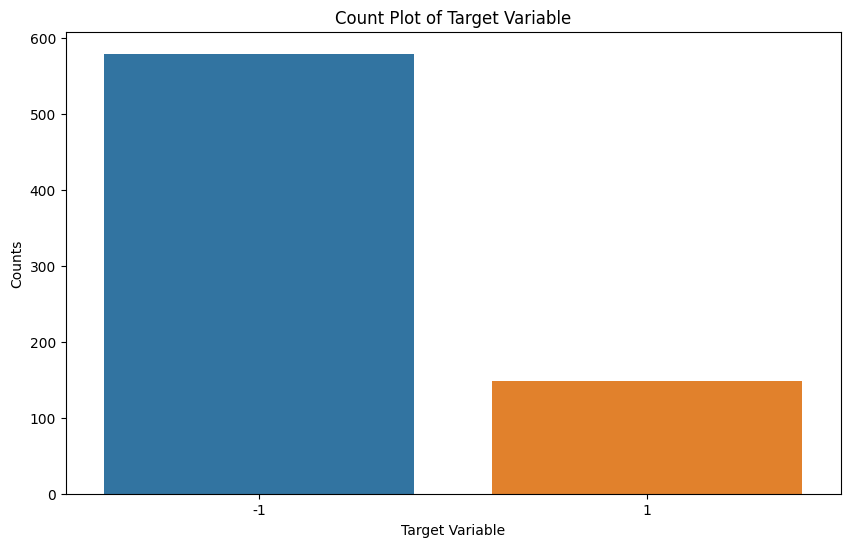

In [ ]:
# Use Seaborn to count and plot
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data= erw_price_df)
plt.xlabel('Target Variable')
plt.ylabel('Counts')
plt.title('Count Plot of Target Variable')
plt.show()


## Data Splitting and scale data for train and test model

In [ ]:
X = erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
       'Stochastic', 'Sto_Corr', 'Volatility','MACD_Con_Di','SAR','Index_Price']]
y = erw_price_df['y']

In [ ]:
X

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,MACD_Con_Di,SAR,Index_Price
0,5.20,5.20,5.20,5.20,700.0,5.215,43.983548,33.333121,44.444268,-11.111146,0.276815,0.425919,0.004774,5.172493,1939.199951
1,5.25,5.30,5.20,5.25,949322.0,5.225,53.331555,66.666561,44.444268,22.222293,0.377555,0.676680,0.006209,5.177593,1939.500000
2,5.25,5.30,5.25,5.25,669503.0,5.230,53.331555,66.666561,55.555414,11.111146,0.412295,0.676680,0.006834,5.182489,1936.099976
3,5.25,5.30,5.25,5.25,226700.0,5.235,53.331555,66.666561,66.666561,0.000000,0.251918,0.676680,0.006904,5.187190,1930.489990
4,5.30,5.30,5.25,5.25,653700.0,5.240,53.331555,66.666561,66.666561,0.000000,0.262363,0.430015,0.006605,5.191702,1929.369995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,5.20,5.25,5.20,5.20,317900.0,5.220,42.087430,0.000000,0.000000,0.000000,0.420342,0.425919,-0.007238,5.332876,1941.689941
723,5.25,5.25,5.20,5.20,362100.0,5.220,42.087430,0.000000,0.000000,0.000000,0.399043,0.000000,-0.006344,5.330219,1942.380005
724,5.25,5.25,5.20,5.20,175800.0,5.215,42.087430,0.000000,0.000000,0.000000,0.444878,0.000000,-0.005350,5.327614,1941.170044
725,5.25,5.25,5.20,5.20,1028400.0,5.210,42.087430,0.000000,0.000000,0.000000,0.532327,0.000000,-0.004334,5.325062,1938.969971


In [ ]:
#Generate Train/Test dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=123)

In [ ]:
X_train

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,MACD_Con_Di,SAR,Index_Price
149,5.40,5.45,5.40,5.45,158700.0,5.445,55.692640,66.666560,55.555520,11.111041,0.763973,0.651726,-0.005136,5.346055,1939.349976
616,5.20,5.20,5.15,5.20,945400.0,5.200,55.793009,49.999761,33.333174,16.666587,0.590716,1.251685,-0.002260,5.248000,1940.650024
254,5.10,5.20,5.10,5.15,967500.0,5.275,34.641907,16.666719,16.666719,0.000000,0.340262,1.823641,-0.021879,5.388120,1898.010010
68,5.05,5.10,5.05,5.10,915925.0,5.025,56.632994,66.666561,33.333334,33.333228,0.454802,0.545022,0.005169,5.130219,1894.560059
122,5.30,5.30,5.25,5.25,898900.0,5.310,45.954409,0.000000,22.222293,-22.222293,0.761877,0.421901,-0.015251,5.382710,1934.439941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,5.20,5.20,5.20,5.20,1278000.0,5.200,51.351690,49.999761,49.999761,0.000000,0.878991,0.676680,-0.001083,5.155881,1940.349976
559,5.10,5.10,5.05,5.05,333900.0,5.060,42.248454,0.000000,0.000000,0.000000,0.560929,0.000000,-0.003878,5.172561,1928.969971
65,5.00,5.00,5.00,5.00,7403.0,5.035,43.290223,0.000000,0.000000,0.000000,0.691355,0.703614,-0.004522,5.138355,1891.329956
427,5.20,5.25,5.15,5.15,2518501.0,5.180,38.393600,50.000000,58.333293,-8.333294,0.212056,0.807827,-0.003613,5.054000,1880.510010


In [ ]:
#For X train and X test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_test_scaled


array([[-0.5170885 , -0.32851416, -0.32790889, ..., -0.36521605,
         0.28788335,  1.05878834],
       [ 0.34005452,  0.09189681,  0.1222671 , ..., -0.04390219,
         0.67605254,  0.71938375],
       [-0.08851904,  0.09189681,  0.1222671 , ..., -0.98669139,
         0.94680786,  1.0497221 ],
       ...,
       [ 0.34005452,  0.51230778,  0.1222671 , ...,  0.23979497,
        -0.33998778,  0.79641609],
       [ 0.34005452,  0.09189681,  0.1222671 , ..., -0.48392687,
         0.5757209 , -0.02355495],
       [-0.08851904,  0.09189681,  0.1222671 , ...,  0.63066208,
        -0.89172041, -0.01697554]])

In [ ]:
#For whole X
from sklearn.preprocessing import StandardScaler
scaler_erw = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler_erw.fit_transform(X)


In [ ]:
X_scaled

array([[-0.0962084 , -0.32734955,  0.10915355, ...,  0.64837896,
        -0.30034333,  0.93801666],
       [ 0.32260982,  0.49612095,  0.10915355, ...,  0.84215332,
        -0.26075777,  0.95129571],
       [ 0.32260982,  0.49612095,  0.54807019, ...,  0.92656397,
        -0.22275564,  0.80082339],
       ...,
       [ 0.32260982,  0.0843857 ,  0.10915355, ..., -0.7184813 ,
         0.9036204 ,  1.0252056 ],
       [ 0.32260982,  0.0843857 ,  0.10915355, ..., -0.58129232,
         0.88381101,  0.92783861],
       [-0.0962084 ,  0.0843857 ,  0.10915355, ..., -0.01726612,
         0.86439781,  1.0663609 ]])

## Modeling : Logistic Regression

The GridSearchCV was applied to determine optimal set of hyperparameters

Initialize a Logistic Regression and fit models to its GridSearchCV

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Adjust classweight
class_weights = {-1: 1, 1: 2.5}
logis_model = LogisticRegression(class_weight =class_weights,max_iter=500,random_state =123,verbose =1)


solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
c_values = np.logspace(-2, 2, 100)
penalty = ['l2','elasticnet']

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logis_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_search.fit(X_train_scaled , y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=10, error_score=0,
             estimator=LogisticRegression(class_weight={-1: 1, 1: 2.5},
                                          max_iter=500, random_state=123,
                                          verbose=1),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.053855...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

## Get the best parameters and Evaluate Model with Test data set

In [ ]:
from sklearn.metrics import roc_auc_score
# Get the best estimator from the search
best_logis_model = grid_search.best_estimator_

print("Best parameter")
print(grid_search.best_params_)



# Predict on the test set
logis_y_pred_prob = best_logis_model.predict_proba(X_test_scaled)[:, 1]


# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, logis_y_pred_prob)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {rf_roc_auc }")



Best parameter
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
ROC-AUC Score: 0.7566091954022989


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


# Make predictions on the test set
logis_y_pred = best_logis_model.predict(X_test_scaled)

# Calculate the confusion matrix
logis_conf_matrix = confusion_matrix(y_test,logis_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(logis_conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, logis_y_pred)
print("\nAccuracy:", accuracy)

#F-1 score
logis_f1_test = f1_score(y_test, logis_y_pred)
print('The f1 score for the testing data:', logis_f1_test)



Confusion Matrix:
[[106  10]
 [ 18  12]]

Accuracy: 0.8082191780821918
The f1 score for the testing data: 0.4615384615384615


<Figure size 800x600 with 0 Axes>

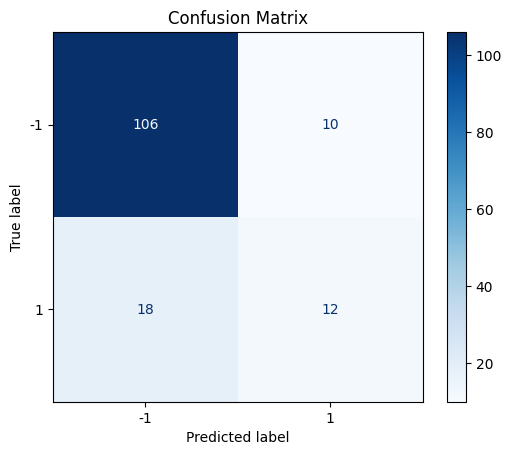

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = np.array([-1, 1])

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix= logis_conf_matrix , display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Get coefficient to find feature importance

        Feature  Coefficient  Abs_Coefficient
9    Stochastic    -0.289179         0.289179
7            %K    -0.178523         0.178523
6           RSI    -0.163505         0.163505
4        Volume     0.153634         0.153634
14  Index_Price     0.120105         0.120105
13          SAR    -0.085651         0.085651
3         Close    -0.083815         0.083815
1          High     0.056747         0.056747
10     Sto_Corr    -0.048655         0.048655
5           SME    -0.048225         0.048225
11   Volatility    -0.044269         0.044269
0          Open     0.029604         0.029604
8            %D    -0.026334         0.026334
12  MACD_Con_Di    -0.022740         0.022740
2           Low     0.007345         0.007345


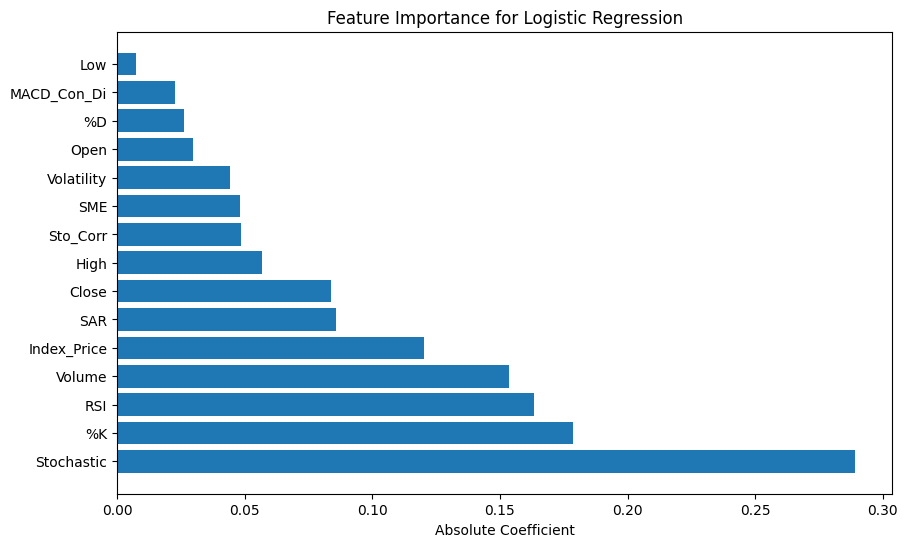

In [ ]:
# Get feature coefficients
feature_coefficients = best_logis_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance for Logistic Regression')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, logis_y_pred))



              precision    recall  f1-score   support

          -1       0.85      0.91      0.88       116
           1       0.55      0.40      0.46        30

    accuracy                           0.81       146
   macro avg       0.70      0.66      0.67       146
weighted avg       0.79      0.81      0.80       146



Final train model with whole data


In [ ]:
final_logis_model = LogisticRegression(class_weight = {-1: 1, 1: 2.5}, max_iter=500,random_state =123,verbose =1,n_jobs=-1,solver = 'newton-cg',C=0.01,penalty = 'l2')
final_logis_model.fit(X_scaled,y)
final_logis_model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.01, class_weight={-1: 1, 1: 2.5}, max_iter=500,
                   n_jobs=-1, random_state=123, solver='newton-cg', verbose=1)

Save Code and scaler

In [ ]:
import joblib
joblib.dump(scaler_erw, 'erw_standard_scaler')

['erw_standard_scaler']

In [ ]:
joblib.dump(final_logis_model, 'erw_logistic')

['erw_logistic']

# Logistic without stochastic correlation

In [ ]:
X2 = erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
       'Stochastic', 'Volatility', 'Index_Price', 'MACD_Con_Di','SAR']]
y2 = erw_price_df['y']

In [ ]:
#Generate Train/Test dataset (80/20)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,
                                                    stratify=y, random_state=123)

In [ ]:
#For X train and X test
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(with_mean=True, with_std=True)
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Adjust classweight
class_weights2 = {-1: 1, 1: 2.5}

logis_model2 = LogisticRegression(class_weight =class_weights2,max_iter=500,random_state =123,verbose =1)
solvers2 = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
c_values2 = np.logspace(-2, 2, 100)
penalty2 = ['l2','elasticnet']



# define grid search
grid2 = dict(solver=solvers2,penalty=penalty2,C=c_values2)
grid_search2 = GridSearchCV(estimator=logis_model2, param_grid=grid2, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_search2.fit(X2_train_scaled , y2_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=10, error_score=0,
             estimator=LogisticRegression(class_weight={-1: 1, 1: 2.5},
                                          max_iter=500, random_state=123,
                                          verbose=1),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.053855...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import roc_auc_score
# Get the best estimator from the search
best_logis_model2 = grid_search2.best_estimator_

print("Best parameter")
print(grid_search2.best_params_)



# Predict on the test set
logis_y_pred_prob2 = best_logis_model2.predict_proba(X2_test_scaled)[:, 1]


# Calculate ROC-AUC score
rf_roc_auc2 = roc_auc_score(y2_test, logis_y_pred_prob2)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {rf_roc_auc2}")



Best parameter
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
ROC-AUC Score: 0.7497126436781609


        Feature  Coefficient  Abs_Coefficient
9    Stochastic    -0.288579         0.288579
7            %K    -0.178446         0.178446
6           RSI    -0.163053         0.163053
4        Volume     0.155652         0.155652
11  Index_Price     0.116679         0.116679
13          SAR    -0.084045         0.084045
3         Close    -0.084008         0.084008
1          High     0.057826         0.057826
5           SME    -0.047574         0.047574
10   Volatility    -0.046778         0.046778
0          Open     0.029993         0.029993
8            %D    -0.026620         0.026620
12  MACD_Con_Di    -0.021952         0.021952
2           Low     0.008235         0.008235


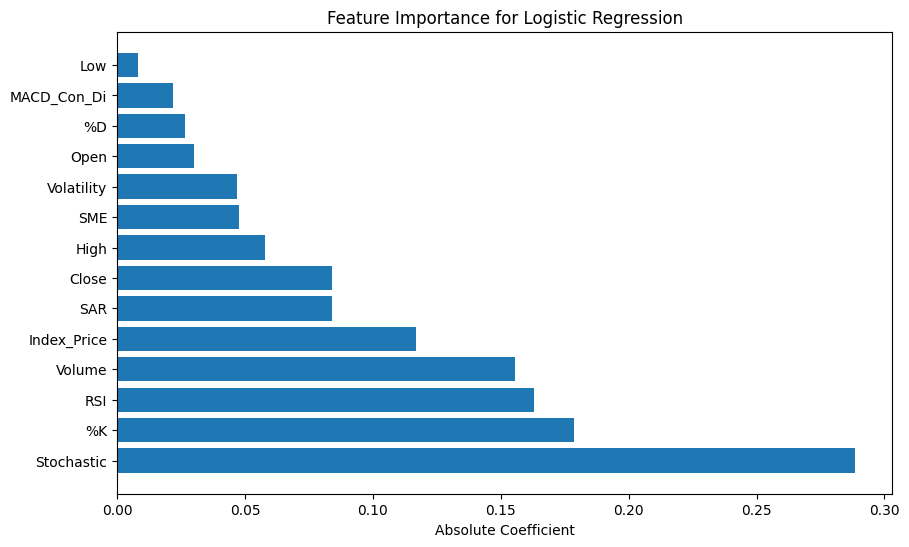

In [ ]:
# Get feature coefficients
feature_coefficients2 = best_logis_model2.coef_[0]

# Create a DataFrame to display feature coefficients
feature_importance_df2 = pd.DataFrame({'Feature': X2.columns, 'Coefficient': feature_coefficients2})

# Sort the DataFrame by coefficient magnitude in descending order
feature_importance_df2['Abs_Coefficient'] = np.abs(feature_importance_df2['Coefficient'])
feature_importance_df2 = feature_importance_df2.sort_values(by='Abs_Coefficient', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df2)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance for Logistic Regression')
plt.show()